# Project Title: Diabetes Health Indicators Analysis

## Student Name: Smart Israel 



---

# 1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **Data Sources:**

  * CDC Diabetes Health Indicators Dataset: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
  * Kaggle Dataset: Diabetes Health Indicators
  * Repository_url: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators,
  * Data_url: https://archive.ics.uci.edu/static/public/891/data.csv
  * There is as well a python library created for the data for easy import and use

  **Data agrregation:**

  * Aggregation from multiple sources is not necessary for this dataset as it provides comprehensive information relevant to diabetes health indicators.
   






In [ ]:
#code if necessary

!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)



{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_



# 2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Data Format:**
 * The dataset is available in CSV format with columns including: age, sex, race, diabetes status, BMI, blood pressure, cholesterol levels, physical activity, etc.

 **Planned Transformation:**

      * Load data into a DataFrame.
      * Normalize or standardize numerical features such as age, BMI, and lab results.
      * Aggregate survey responses into relevant features if needed.





In [ ]:
# put the data into pandas  and apply thes to it:
# Planned Transformation:
# Convert categorical variables to numeric using one-hot encoding.
# Normalize or standardize numerical features such as age, BMI, and lab results.
# Aggregate survey responses into relevant features if needed.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Create pandas DataFrames from the fetched data
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

X_df.shape

(253680, 21)

In [ ]:
print(y_resampled[:5000])

NameError: name 'y_resampled' is not defined

In [ ]:
# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_df.select_dtypes(include=['object']))
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=encoder.get_feature_names_out(X_df.select_dtypes(include=['object']).columns))

# Standardize numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_df.select_dtypes(include=['number']))
X_numerical_df = pd.DataFrame(X_numerical, columns=X_df.select_dtypes(include=['number']).columns)

# Combine processed data
X_processed = pd.concat([X_numerical_df, X_encoded_df], axis=1)

# Aggregate survey responses if needed (example)
# Assuming survey responses are in columns 'Survey1', 'Survey2', etc.
# X_processed['SurveyAggregate'] = X_processed[['Survey1', 'Survey2']].mean(axis=1)

X_processed

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.963272,0.456813
253676,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,-2.074316,...,0.226863,-0.303173,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,-3.094461,-0.991662
253677,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,-2.074316,...,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,-0.051162,-1.957312
253678,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,-0.051162,-2.440138


# 3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
**Features Included:**
   * Age, Sex, Race, Diabetes Status, BMI, Blood Pressure, Cholesterol Levels, Physical Activity, etc.

**EDA Findings:**

* Distributions of continuous variables like BMI and cholesterol levels.
* Correlation between diabetes status and health indicators.
* Outliers detected in BMI and cholesterol levels.

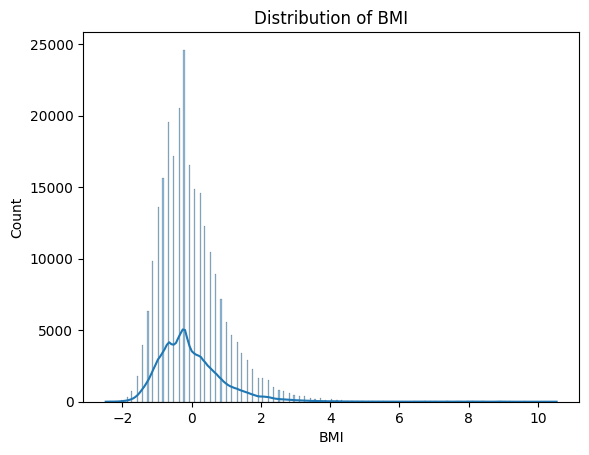

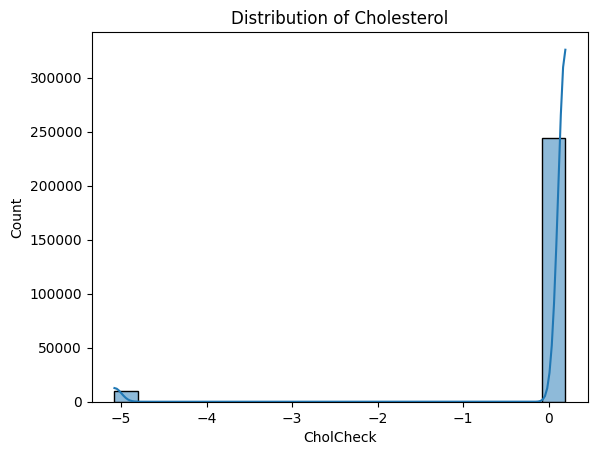

HighBP                  0.263129
HighChol                0.200276
CholCheck               0.064761
BMI                     0.216843
Smoker                  0.060789
Stroke                  0.105816
HeartDiseaseorAttack    0.177282
PhysActivity           -0.118133
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
AnyHealthcare           0.016255
NoDocbcCost             0.031433
GenHlth                 0.293569
MentHlth                0.069315
PhysHlth                0.171337
DiffWalk                0.218344
Sex                     0.031430
Age                     0.177442
Education              -0.124456
Income                 -0.163919
dtype: float64


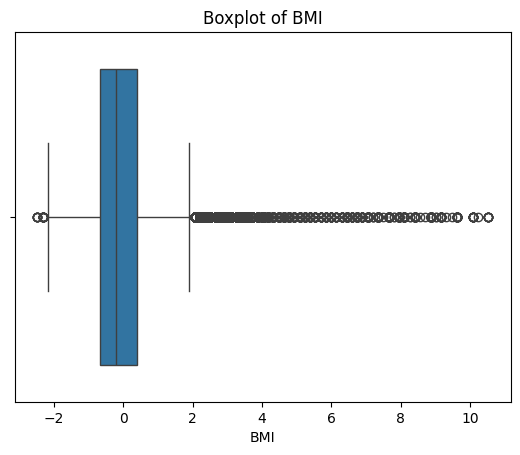

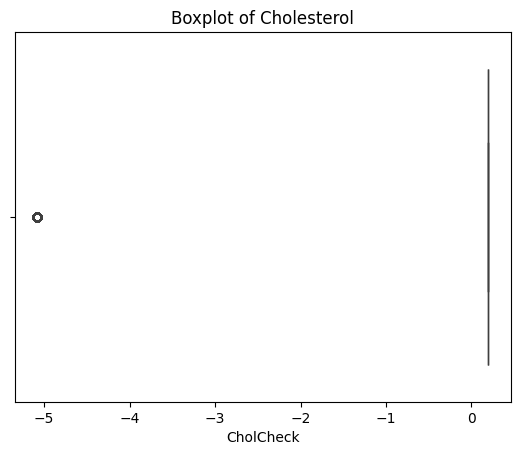

In [ ]:
# EDA Findings:
# Distributions of continuous variables like BMI and cholesterol levels.
# Correlation between diabetes status and health indicators.
# Outliers detected in BMI and cholesterol levels. for the data

import matplotlib.pyplot as plt
import seaborn as sns

# Distributions of continuous variables
sns.histplot(X_processed['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.show()

sns.histplot(X_processed['CholCheck'], kde=True)
plt.title('Distribution of Cholesterol')
plt.show()

# Correlation between diabetes status and health indicators
correlation_matrix = X_processed.corrwith(y_df['Diabetes_binary'])
print(correlation_matrix)

# Outliers detection
sns.boxplot(x=X_processed['BMI'])
plt.title('Boxplot of BMI')
plt.show()

sns.boxplot(x=X_processed['CholCheck'])
plt.title('Boxplot of Cholesterol')
plt.show()





# 4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.


**Hypotheses:**

  * Higher BMI is associated with a higher likelihood of having diabetes.
  * Lack of physical activity correlates with increased diabetes risk.

**Methodologies:**

  * Use t-tests to compare BMI between diabetic and non-diabetic individuals.
  * Perform logistic regression to assess the impact of physical activity on diabetes risk.

# 5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.


**Density Assessment:**
    
  * The dataset is dense and provides detailed information across numerous features.

**Outlier Handling:**
  * Cap extreme values for BMI and Cholesterol Levels to handle outliers.
  * Impute any missing values if found.

In [ ]:
#Cap extreme values for BMI and Cholesterol Levels to handle outliers.
# Impute any missing values if found.

# Cap extreme values for BMI and Cholesterol Levels
bmi_cap = X_processed['BMI'].quantile(0.99)
chol_cap = X_processed['CholCheck'].quantile(0.99)

X_processed['BMI'] = X_processed['BMI'].clip(upper=bmi_cap)
X_processed['CholCheck'] = X_processed['CholCheck'].clip(upper=chol_cap)

# Impute missing values (if any)
X_processed = X_processed.fillna(X_processed.mean())

X_processed.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


# 6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

     **This dataset has a python library that make it easy to import and split them**

      70% training, 15% validation, 15% tes

# 7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
   
  **Techniques:**
  * Applied SMOTE to address any class imbalance.
  * Ensure diverse representation across demographic groups in training data.


In [ ]:
# Bias Mitigation:
# Techniques:
# Apply SMOTE to address any class imbalance.
# Ensure diverse representation across demographic groups in training data.

from imblearn.over_sampling import SMOTE

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y_df['Diabetes_binary'])

# Verify class distribution after SMOTE
print(X_resampled)


          HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0       1.153688  1.165254   0.196922  1.757936  1.120927 -0.205637   
1      -0.866785 -0.858182  -5.078164 -0.511806  1.120927 -0.205637   
2       1.153688  1.165254   0.196922 -0.057858 -0.892119 -0.205637   
3       1.153688 -0.858182   0.196922 -0.209174 -0.892119 -0.205637   
4       1.153688  1.165254   0.196922 -0.663122 -0.892119 -0.205637   
...          ...       ...        ...       ...       ...       ...   
436663 -0.866785 -0.858182   0.196922  1.787548 -0.892119 -0.205637   
436664  1.153688  1.165254   0.196922 -0.479749 -0.892119 -0.205637   
436665  1.153688  1.165254   0.196922  1.001355 -0.892119 -0.205637   
436666  1.153688 -0.858182   0.196922  0.553446 -0.892119 -0.205637   
436667  1.153688  1.165254   0.196922  1.867070 -0.892119 -0.205637   

        HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
0                  -0.322458     -1.762814 -1.316872  0.482087  ...   
1    

In [ ]:
from sklearn.utils import shuffle
# Shuffle the data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Sample the data
sample_size = 5000  # Adjust the sample size as needed
X_sampled = X_resampled.sample(n=sample_size, random_state=42)
y_sampled = y_resampled.loc[X_sampled.index]

# Verify the distribution of the target variable in the sampled data
print(y_sampled.value_counts())
print(X_sampled.value_counts())

Diabetes_binary
1    2536
0    2464
Name: count, dtype: int64
HighBP     HighChol   CholCheck  BMI        Smoker     Stroke     HeartDiseaseorAttack  PhysActivity  Fruits     Veggies    HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth    MentHlth   PhysHlth   DiffWalk   Sex        Age        Education  Income   
 1.153688   1.165254  0.196922   -0.360490   1.120927  -0.205637   3.101183              0.567275      0.759375   0.482087  -0.244014           0.226863      -0.303173    -0.478619  -0.429630  -0.486592  -0.449718   1.127369   0.644317   0.963272  -0.026012    2
           -0.858182  0.196922   -0.663122   1.120927  -0.205637  -0.322458              0.567275      0.759375   0.482087  -0.244014           0.226863      -0.303173    -0.478619  -0.429630  -0.486592  -0.449718  -0.887021   0.644317   0.963272   0.939638    2
-0.866785  -0.858182  0.196922   -0.511806  -0.892119  -0.205637  -0.322458              0.567275      0.759375   0.482087  -0.244014           0.226863  

# Building Simple model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming X_sampled and y_sampled are already defined and processed (encoded and standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.5637 - accuracy: 0.7100 - val_loss: 0.4984 - val_accuracy: 0.7540
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7542 - val_loss: 0.4930 - val_accuracy: 0.7600
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7575 - val_loss: 0.4930 - val_accuracy: 0.7590
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7630 - val_loss: 0.4935 - val_accuracy: 0.7560
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7692 - val_loss: 0.4928 - val_accuracy: 0.7600
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7695 - val_loss: 0.4922 - val_accuracy: 0.7590
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7745 - val_loss: 0.4880 - val_accuracy: 0.7650
Epoch 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')



32/32 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7260
Accuracy: 72.60%


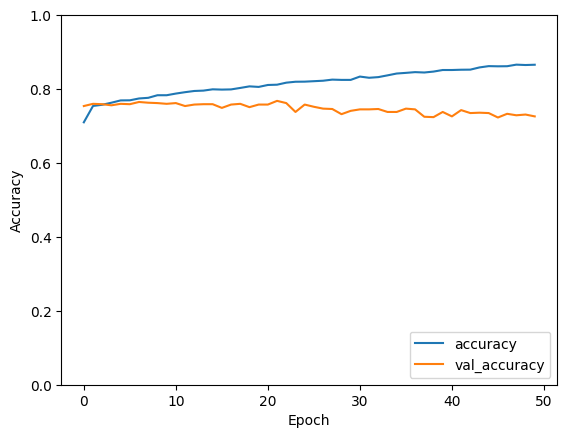

In [ ]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



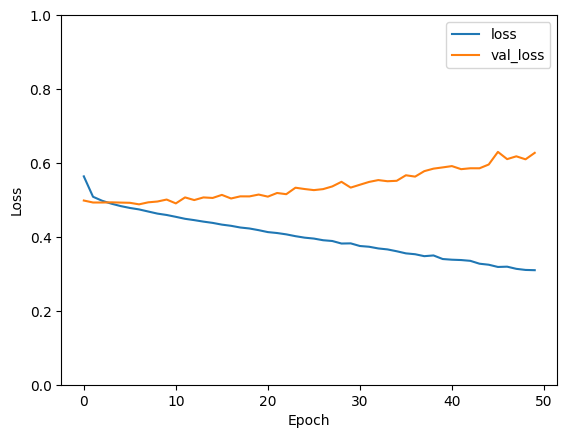

In [ ]:
# Plot the loss history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

# Regularized model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming X_sampled and y_sampled are already defined and processed (encoded and standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Build the TensorFlow model with Dropout regularization
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model with L2 regularization
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/50
125/125 [==============================] - 5s 11ms/step - loss: 0.6768 - accuracy: 0.6115 - val_loss: 0.5355 - val_accuracy: 0.7470
Epoch 2/50
125/125 [==============================] - 1s 7ms/step - loss: 0.5865 - accuracy: 0.6930 - val_loss: 0.5109 - val_accuracy: 0.7480
Epoch 3/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5605 - accuracy: 0.7103 - val_loss: 0.5116 - val_accuracy: 0.7580
Epoch 4/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5527 - accuracy: 0.7275 - val_loss: 0.5100 - val_accuracy: 0.7530
Epoch 5/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5392 - accuracy: 0.7253 - val_loss: 0.5112 - val_accuracy: 0.7560
Epoch 6/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5346 - accuracy: 0.7327 - val_loss: 0.5074 - val_accuracy: 0.7550
Epoch 7/50
125/125 [==============================] - 1s 7ms/step - loss: 0.5322 - accuracy: 0.7370 - val_loss: 0.5011 - val_accuracy: 0.7570
Epoch

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')



32/32 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7590
Accuracy: 75.90%


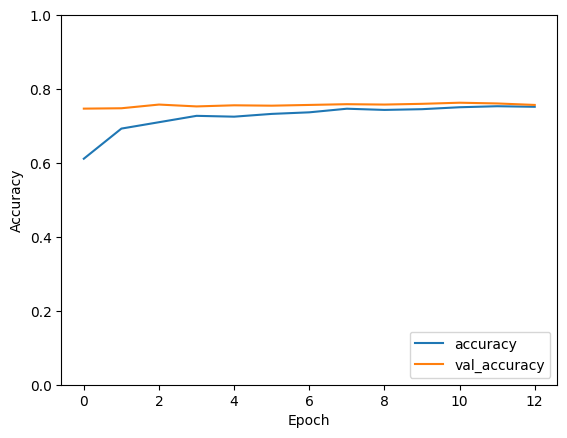

In [ ]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



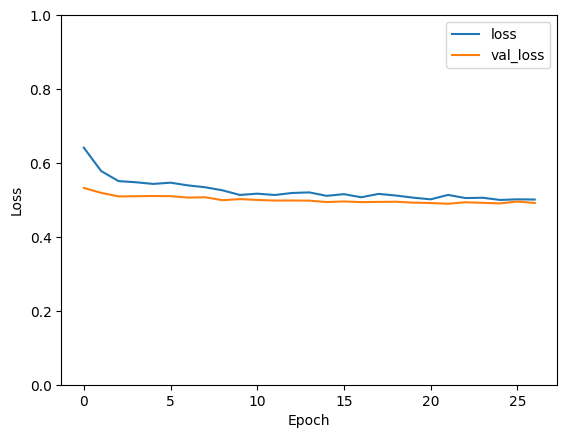

In [ ]:
# Plot the loss history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()


# Building another model to increase accuracy as the model is balanced with lower accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming X_sampled and y_sampled are already defined and processed (encoded and standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Build the TensorFlow model with increased complexity and Dropout regularization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(21,)))
model.add(Dropout(0.4))  # Dropout layer with 40% dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))  # Dropout layer with 40% dropout rate
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))  # Dropout layer with 40% dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# If the dataset is imbalanced, compute class weights
class_weights = {0: (1 / y_train.value_counts()[0]) * (len(y_train) / 2.0),
                 1: (1 / y_train.value_counts()[1]) * (len(y_train) / 2.0)}



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping], class_weight=class_weights)



Epoch 1/50
125/125 [==============================] - 2s 4ms/step - loss: 0.6230 - accuracy: 0.6480 - val_loss: 0.5092 - val_accuracy: 0.7510
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7235 - val_loss: 0.5019 - val_accuracy: 0.7540
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7347 - val_loss: 0.5055 - val_accuracy: 0.7540
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5333 - accuracy: 0.7433 - val_loss: 0.4908 - val_accuracy: 0.7560
Epoch 5/50
125/125 [==============================] - 1s 4ms/step - loss: 0.5239 - accuracy: 0.7455 - val_loss: 0.4958 - val_accuracy: 0.7630
Epoch 6/50
125/125 [==============================] - 1s 6ms/step - loss: 0.5229 - accuracy: 0.7513 - val_loss: 0.5003 - val_accuracy: 0.7600
Epoch 7/50
125/125 [==============================] - 1s 5ms/step - loss: 0.5180 - accuracy: 0.7523 - val_loss: 0.4953 - val_accuracy: 0.7590
Epoch 

In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


32/32 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7560
Accuracy: 75.60%


In [ ]:
model.save('model.keras')

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
n = tf.keras.models.load_model('model.h5')

In [ ]:
""

''

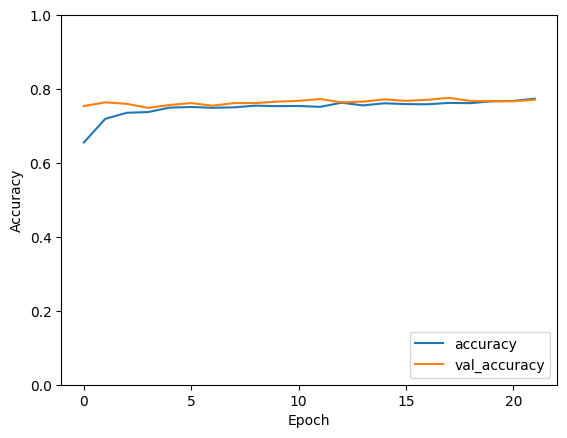

In [ ]:

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


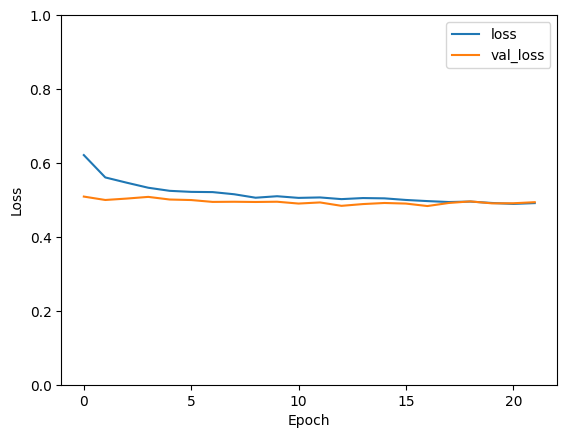

In [ ]:

# Plot the los|s history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

# GOing further

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Assuming X_sampled and y_sampled are already defined and processed (encoded and standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Build the TensorFlow model with increased complexity, Batch Normalization, and Dropout regularization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(21,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting and ReduceLROnPlateau to adjust learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# If the dataset is imbalanced, compute class weights
class_weights = {0: (1 / y_train.value_counts()[0]) * (len(y_train) / 2.0),
                 1: (1 / y_train.value_counts()[1]) * (len(y_train) / 2.0)}



In [ ]:
X_train.shape[1]

21

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr], class_weight=class_weights)



Epoch 1/100
125/125 [==============================] - 3s 6ms/step - loss: 0.8182 - accuracy: 0.6025 - val_loss: 0.5337 - val_accuracy: 0.7530 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.6625 - val_loss: 0.5008 - val_accuracy: 0.7650 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.6823 - val_loss: 0.4958 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6007 - accuracy: 0.6910 - val_loss: 0.4951 - val_accuracy: 0.7650 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5654 - accuracy: 0.7235 - val_loss: 0.4950 - val_accuracy: 0.7590 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7193 - val_loss: 0.4965 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 7/100
125/125 [==============================] - 0s 4ms/st

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')



32/32 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7680
Accuracy: 76.80%


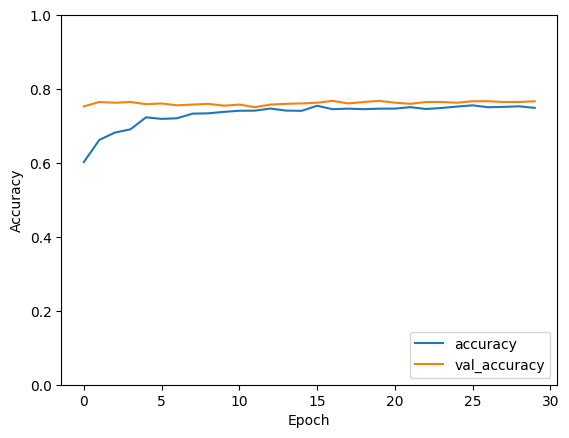

In [ ]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



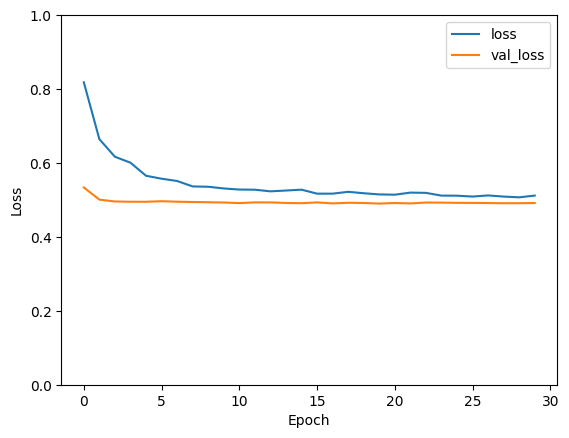

In [ ]:
# Plot the loss history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()


32/32 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       470
           1       0.75      0.85      0.79       530

    accuracy                           0.77      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.77      0.77      0.76      1000



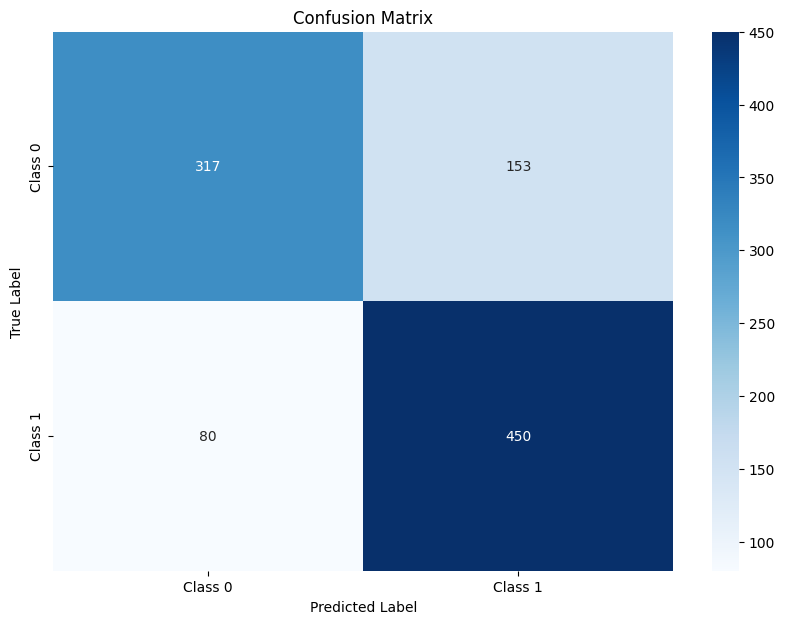

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('model.keras')
